In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### ther are some data that need to be str whether they write in int like example of Id

In [5]:
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)

In [6]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
df_n=df["neighbourhood"].value_counts().reset_index().rename(columns={"count":"number_of_hotel"})

In [17]:
df_n[df_n["number_of_hotel"]>1000]

,neighbourhood,number_of_hotel
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


## NUMERICAL DATA

In [18]:
df["price"].value_counts(bins=5)

price
(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [19]:
bins=(0,50,100,200,500,1000,2000,5000,10000)
df["price"].value_counts(bins=bins)

price
(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 1000.0]        515
(1000.0, 2000.0]        72
(2000.0, 5000.0]        26
(5000.0, 10000.0]        9
Name: count, dtype: int64

## GRAPGICAL APPPROACH ON UNIVARIANT CATEGORICAL DATA

### BAR GRAPH

<Axes: xlabel='neighbourhood_group', ylabel='count'>

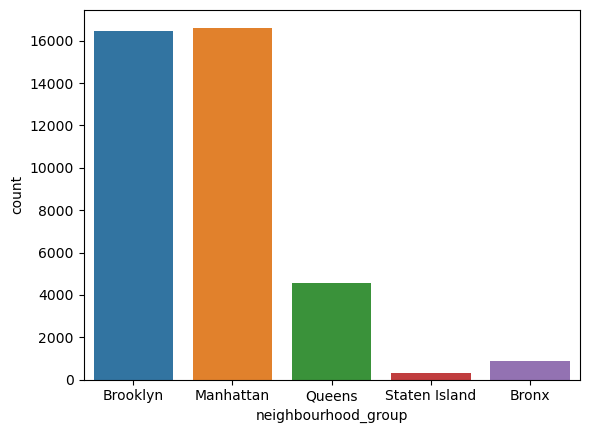

In [22]:
sns.countplot(data=df,x="neighbourhood_group")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

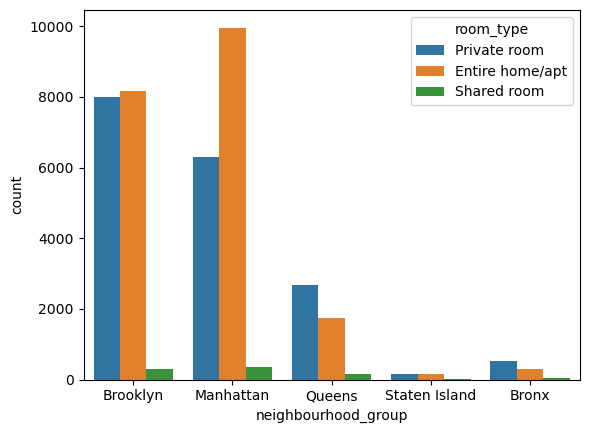

In [23]:
sns.countplot(data=df,x="neighbourhood_group",hue="room_type")

<Axes: xlabel='neighbourhood_group'>

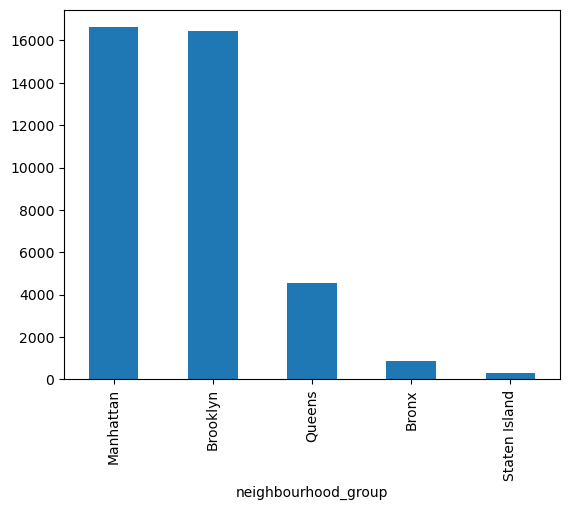

In [27]:
df["neighbourhood_group"].value_counts().plot(kind="bar")

### PIE CHART

<Axes: ylabel='count'>

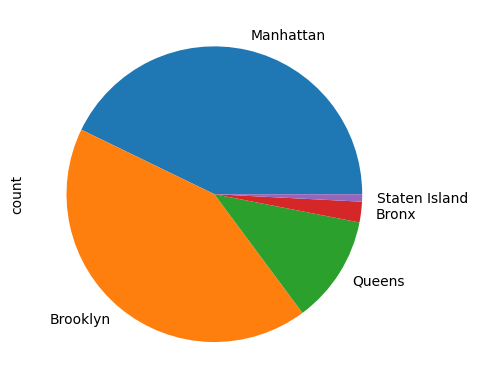

In [28]:
df["neighbourhood_group"].value_counts().plot(kind="pie")

In [ ]:
df["neighbourhood_group"].value_counts().plot(kind="pie",autopct="%0.2f")

## FOR NUMERICAL DATA

### HISTOGRAPH

In [30]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


<Axes: xlabel='price', ylabel='Count'>

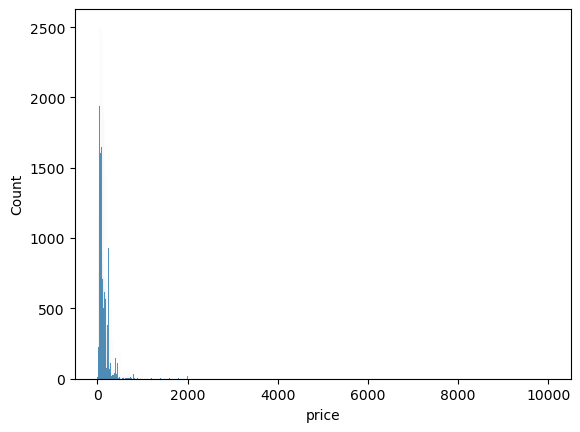

In [31]:
sns.histplot(data=df,x="price")

<Axes: xlabel='price', ylabel='Count'>

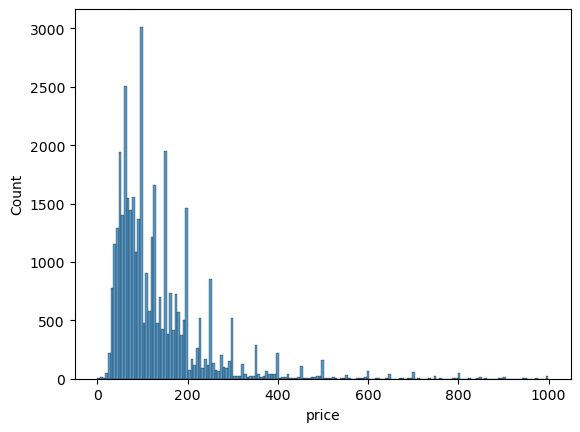

In [32]:
sns.histplot(data=df[df["price"]<1000],x="price")

<Axes: xlabel='price', ylabel='Count'>

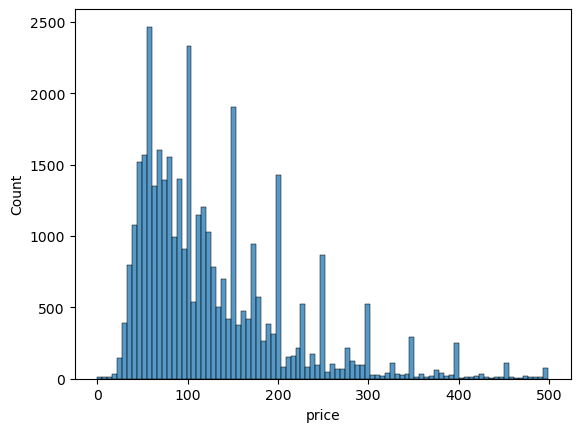

In [33]:
sns.histplot(data=df[df["price"]<500],x="price")

## DISTRIBUTION PLOT

C:\Users\ajay singh\AppData\Local\Temp\ipykernel_22196\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

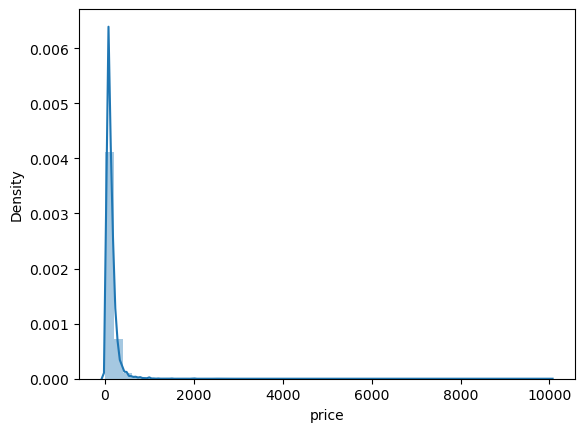

In [36]:
sns.distplot(df["price"])

C:\Users\ajay singh\AppData\Local\Temp\ipykernel_22196\1603039620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])


<Axes: xlabel='availability_365', ylabel='Density'>

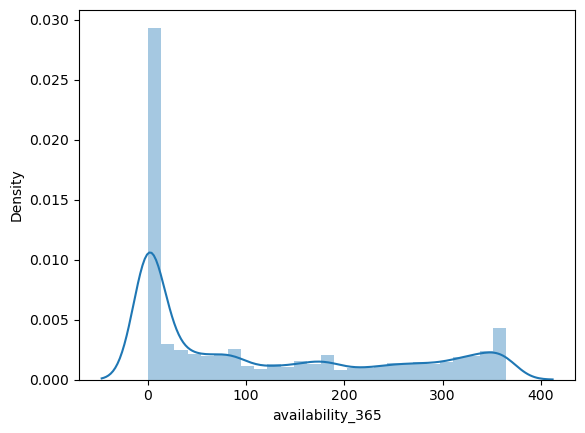

In [37]:
sns.distplot(df["availability_365"])

## BOXPLOT

<Axes: >

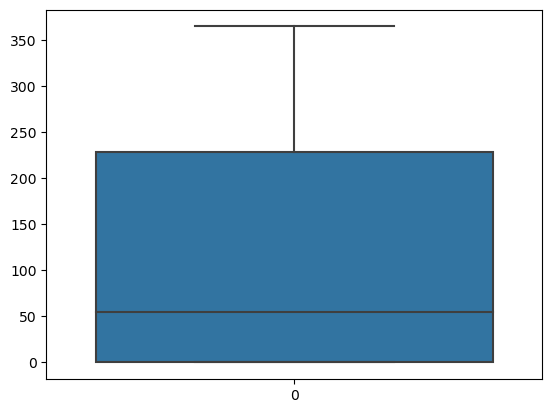

In [38]:
sns.boxplot(df["availability_365"])

<Axes: >

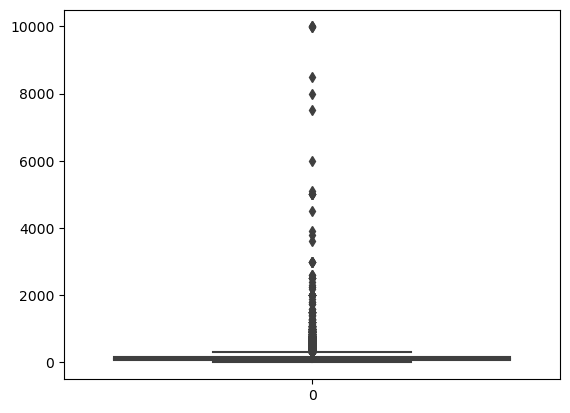

In [39]:
sns.boxplot(df["price"])

### one plot is also common which tell of distibution along with box plot

<Axes: >

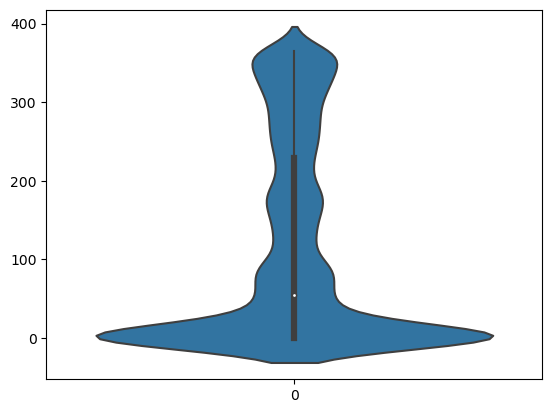

In [41]:
sns.violinplot(df["availability_365"])

## BIVARIENT ANALYSIS OF ONE NUMERCAL AND ONE CATEGORICAL DATA

In [42]:
data=sns.load_dataset("titanic")

In [43]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### bar graph

<Axes: xlabel='class', ylabel='age'>

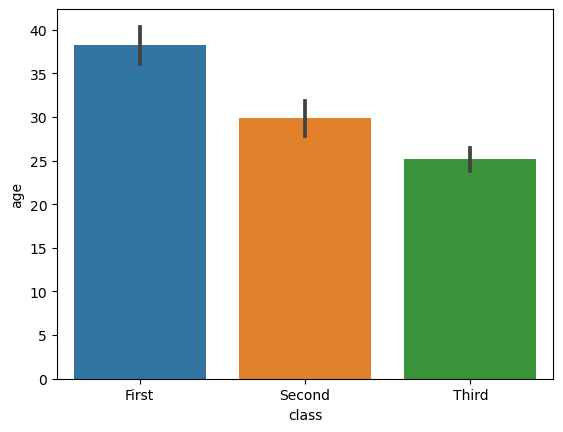

In [45]:
sns.barplot(data=data,x="class",y="age")

<Axes: xlabel='class', ylabel='fare'>

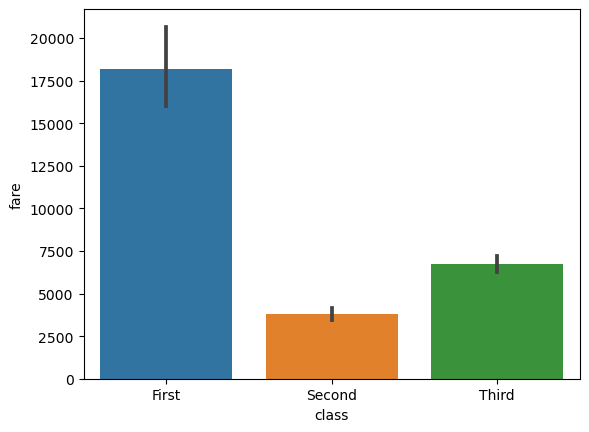

In [46]:
sns.barplot(data=data,x="class",y="fare",estimator='sum')

<Axes: xlabel='class', ylabel='age'>

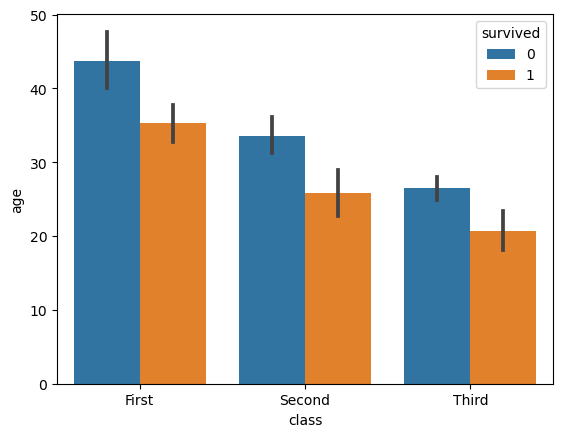

In [47]:
sns.barplot(data=data,x="class",y="age",hue="survived")

### boxplot

<Axes: xlabel='class', ylabel='age'>

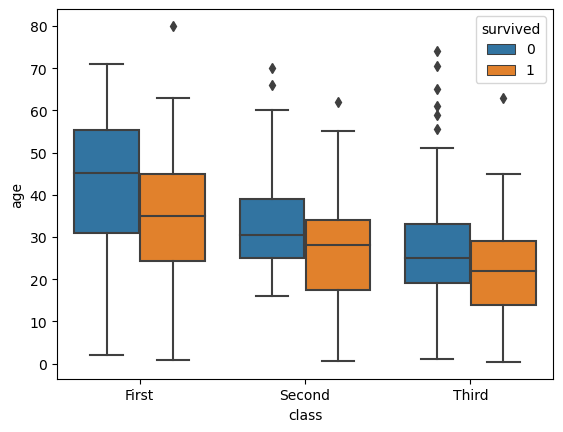

In [48]:
sns.boxplot(data=data,x="class",y="age",hue="survived")

<Axes: xlabel='class', ylabel='age'>

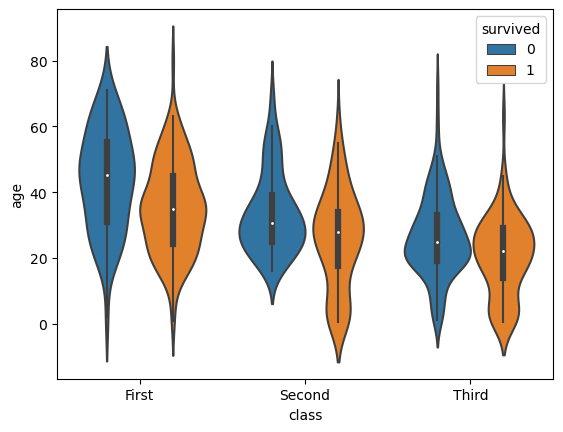

In [49]:
sns.violinplot(data=data,x="class",y="age",hue="survived")

C:\Users\ajay singh\AppData\Local\Temp\ipykernel_22196\3633518830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["class"]=="Second"]["age"])


<Axes: xlabel='age', ylabel='Density'>

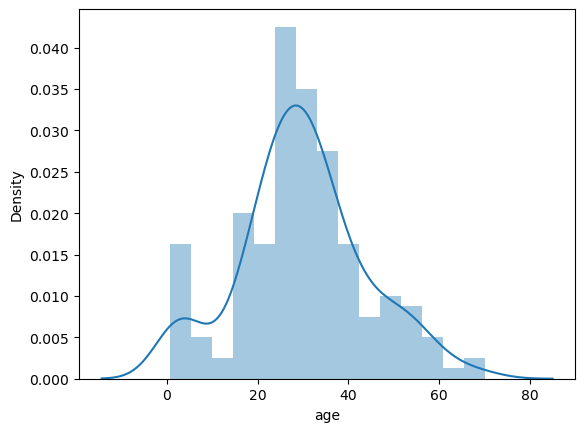

In [51]:
sns.distplot(data[data["class"]=="Second"]["age"])

## advance graph

In [54]:
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
sns.countplot(x="survived",hue="class",data=data)

### this is important in term of data analysis where in category there are subcategories

In [56]:
x=pd.crosstab(data["survived"],data["class"])
x

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


### Heatmap

<Axes: xlabel='class', ylabel='survived'>

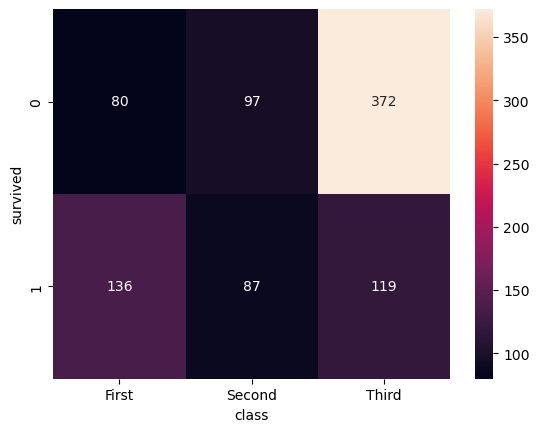

In [60]:
sns.heatmap(x,annot=True,fmt='1g')

### for barplot we need atleast 1 numerical data

<Axes: xlabel='class', ylabel='age'>

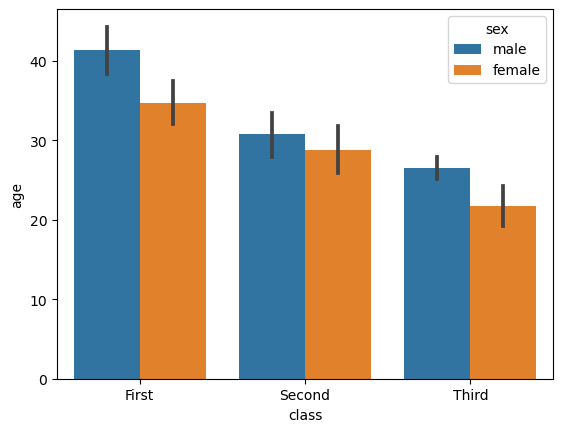

In [62]:
sns.barplot(x="class",y="age",hue="sex",data=data)

<Axes: xlabel='class', ylabel='age'>

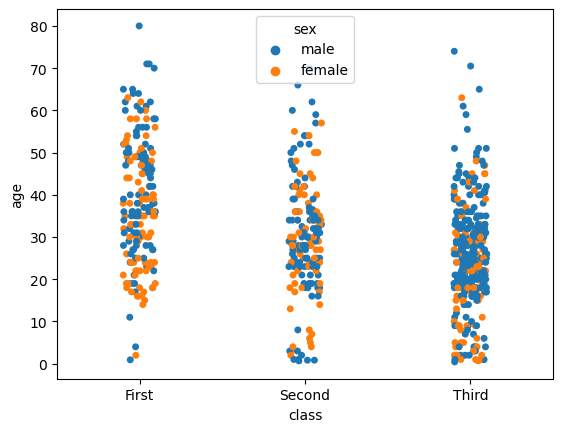

In [63]:
sns.stripplot(x="class",y="age",hue="sex",data=data)

In [64]:
df2=sns.load_dataset("iris")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

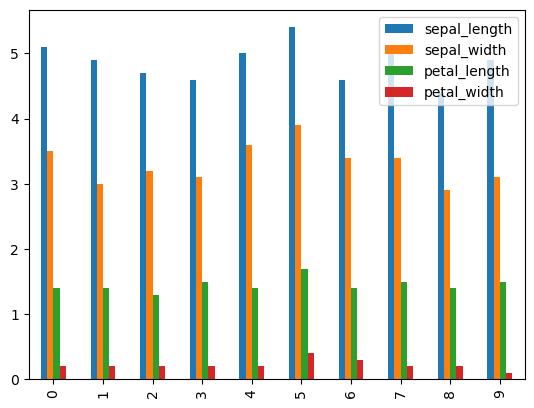

In [66]:
df2.head(10).plot(kind="bar")

<Axes: >

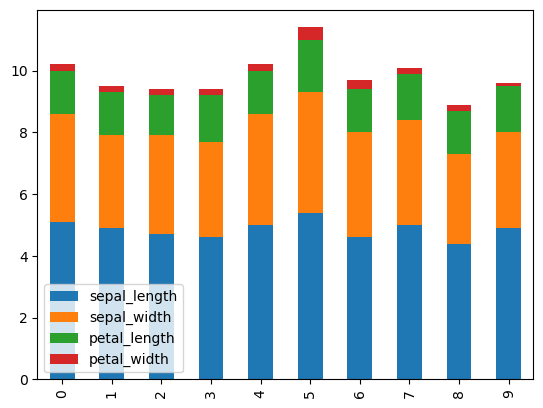

In [67]:
df2.head(10).plot(kind="bar",stacked=True)

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


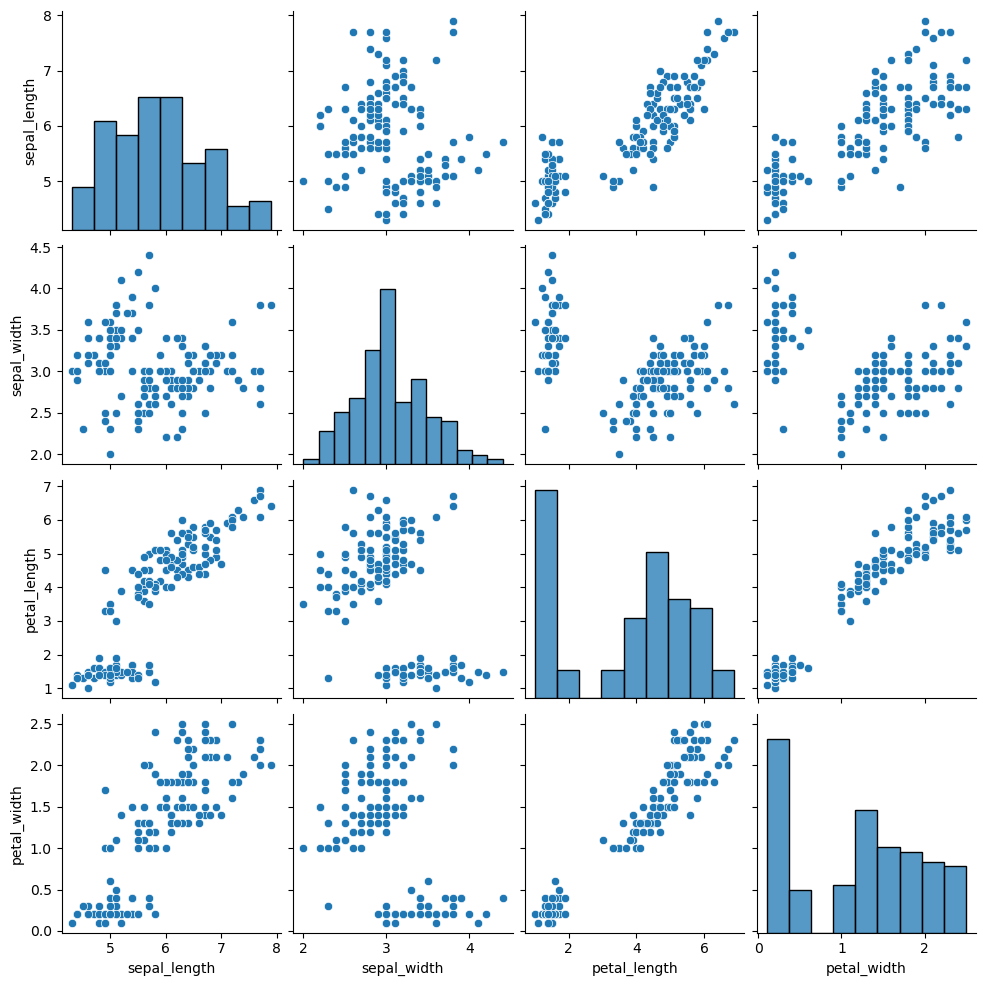

In [69]:
sns.pairplot(df2)

### BIVARIENT ANALYSIS IN NUMERCAL DATA

## SCATTER PLOT

In [70]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<Axes: xlabel='age', ylabel='fare'>

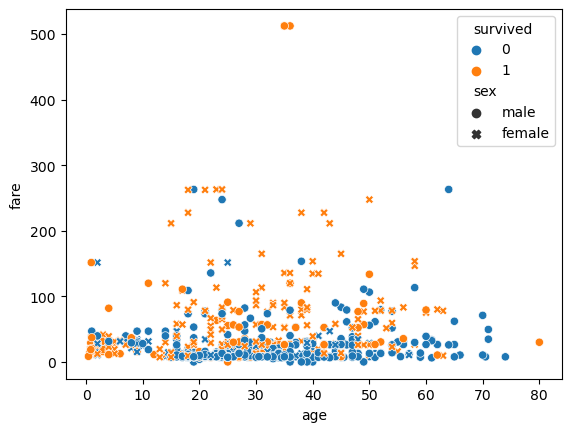

In [71]:
sns.scatterplot(x="age",y="fare",hue="survived",style="sex",data=data)

In [74]:
df3=sns.load_dataset("tips")
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

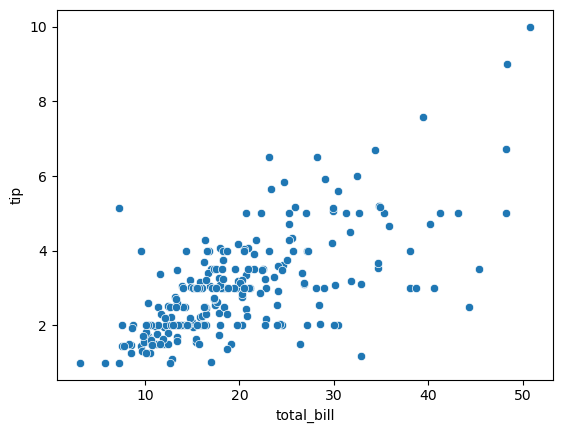

In [75]:
sns.scatterplot(x="total_bill",y="tip",data=df3)

<Axes: xlabel='total_bill', ylabel='tip'>

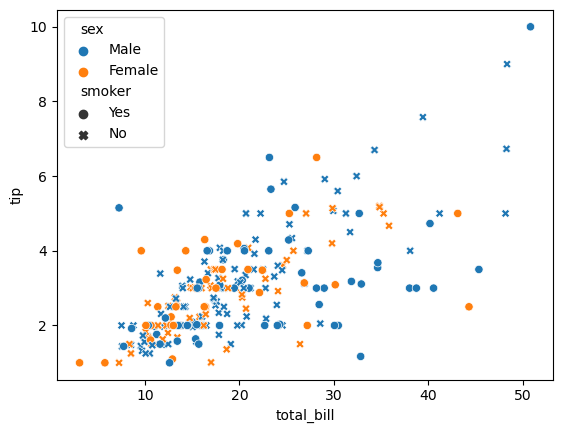

In [76]:
sns.scatterplot(x="total_bill",y="tip",data=df3,hue="sex",style="smoker")

## JOINT PLOT

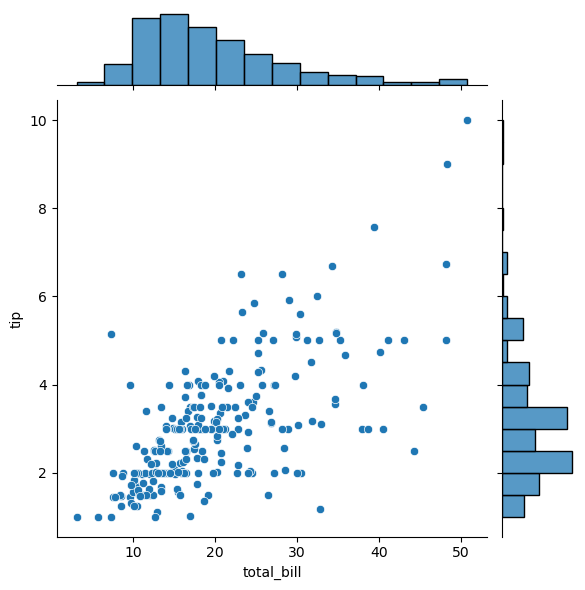

In [78]:
sns.jointplot(x="total_bill",y="tip",data=df3)

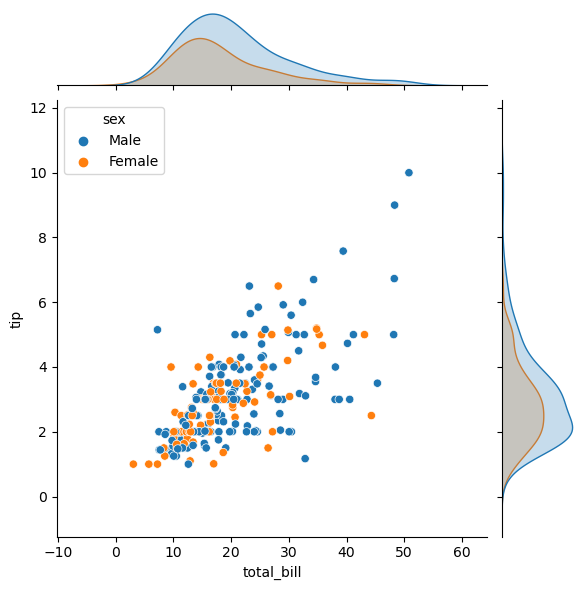

In [79]:
sns.jointplot(x="total_bill",y="tip",data=df3,hue="sex")

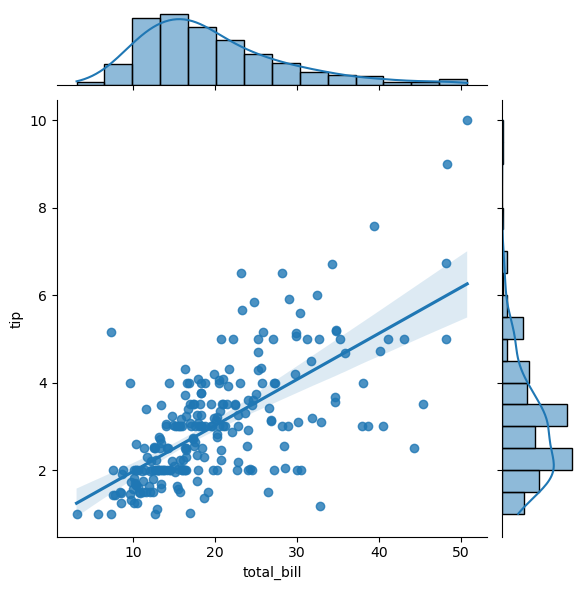

In [80]:
sns.jointplot(x="total_bill",y="tip",data=df3,kind="reg")

In [82]:
df3.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [85]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

## LINE PLOT

In [86]:
df4=sns.load_dataset('dowjones')

In [87]:
df4.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


<Axes: xlabel='Date', ylabel='Price'>

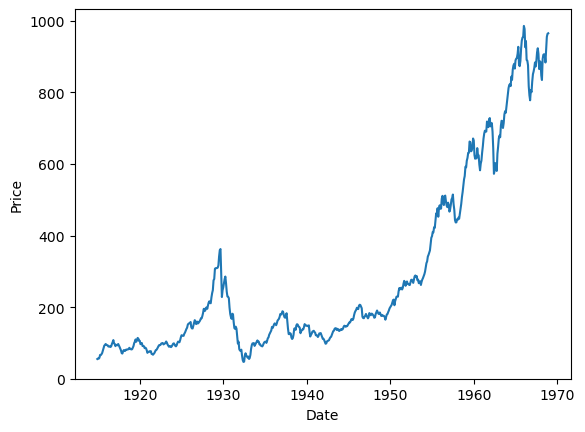

In [89]:
sns.lineplot(y="Price",x="Date",data=df4)

In [91]:
df4["month"]=df4["Date"].dt.month
df4["year"]=df4["Date"].dt.year

In [92]:
df4.head()

,Date,Price,month,year
0,1914-12-01,55.00,12,1914
1,1915-01-01,56.55,1,1915
2,1915-02-01,56.00,2,1915
3,1915-03-01,58.30,3,1915
4,1915-04-01,66.45,4,1915


<Axes: xlabel='Date', ylabel='Price'>

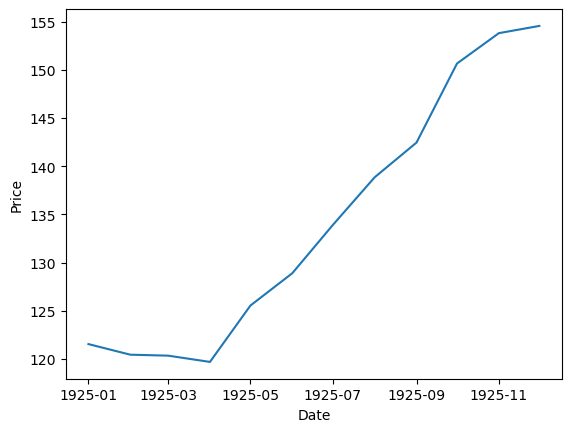

In [93]:
sns.lineplot(y="Price",x="Date",data=df4[df4["year"]==1925])